# Page View Time Series Visualizer

<div class="alert alert-block alert-info">
<b>Description:</b><br> This Notebook shows some analysis I did on page views of the freecodecamp website as part of the final project of the freecodecamp Python Data Analytics course.
</div>

***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=[0])

# Clean data
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]

In [3]:
def draw_line_plot():
# Draw line plot
  monthly_avg = df.groupby([df.index.year, df.index.month]).mean()
  monthly_avg = monthly_avg.unstack(level=0)
  fig, ax = plt.subplots(figsize=(10, 6))

  for year in monthly_avg.columns:
    ax.plot(monthly_avg.index, monthly_avg[year], label=str(year))
  # Set the axis labels and title
  ax.set_xlabel('Years')
  ax.set_ylabel('Average Page Views')
  ax.set_title('Average Daily Page Views by Month and Year')

  # Add the legend
  ax.legend(title='Months')

  plt.show()



    # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig

In [4]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    # Create a new column for the year and month
  df['year'] = df.index.year
  df['month'] = df.index.month_name()

  # Calculate the average daily page views for each month grouped by year
  df_bar = df.groupby(['year', 'month'])['value'].mean().reset_index()

    # Draw bar plot
  plt.figure(figsize=(12, 8))
    
    # Use Seaborn to draw the bar plot
  sns.barplot(x='year', y='value', hue='month', data=df_bar)
    
    # Set the axis labels and title
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')
  plt.title('Average Daily Page Views by Month and Year')
    
    # Set the legend title and location
  plt.legend(title='Months', loc='upper left')

  plt.show()
    
    # Save image and return fig (don't change this part)
  fig = plt.savefig('bar_plot.png')
  return fig

In [5]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    
    # Year-wise box plot
  sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
  ax1.set_xlabel('Year')
  ax1.set_ylabel('Page Views')
  ax1.set_title('Year-wise Box Plot (Trend)')
    
    # Month-wise box plot
  sns.boxplot(x='month', y='value', data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  ax2.set_xlabel('Month')
  ax2.set_ylabel('Page Views')
  ax2.set_title('Month-wise Box Plot (Seasonality)')
    
    # Rotate the x-axis labels on the second plot
  plt.setp(ax2.get_xticklabels(), rotation=45)
    
  plt.tight_layout()
  plt.show()





    # Save image and return fig (don't change this part)
  fig.savefig('box_plot.png')
  return fig

## In usage

In [6]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=[0])
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]

In [7]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


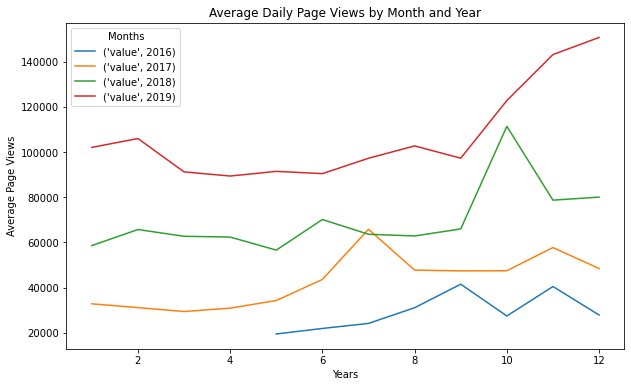

In [9]:
monthly_avg = df.groupby([df.index.year, df.index.month]).mean()
monthly_avg = monthly_avg.unstack(level=0)
fig, ax = plt.subplots(figsize=(10, 6))

for year in monthly_avg.columns:
    ax.plot(monthly_avg.index, monthly_avg[year], label=str(year))
 
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Daily Page Views by Month and Year')

ax.legend(title='Months')

plt.show()

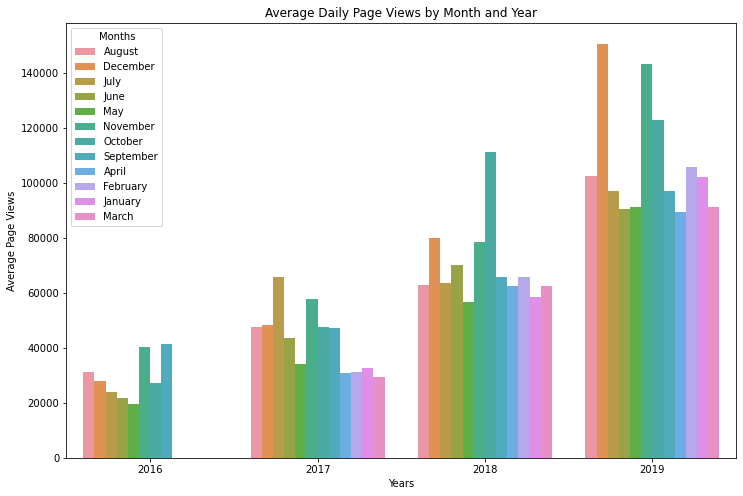

In [10]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

df_bar = df.groupby(['year', 'month'])['value'].mean().reset_index()

plt.figure(figsize=(12, 8))
    
sns.barplot(x='year', y='value', hue='month', data=df_bar)
    
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Daily Page Views by Month and Year')
    
plt.legend(title='Months', loc='upper left')

plt.show()

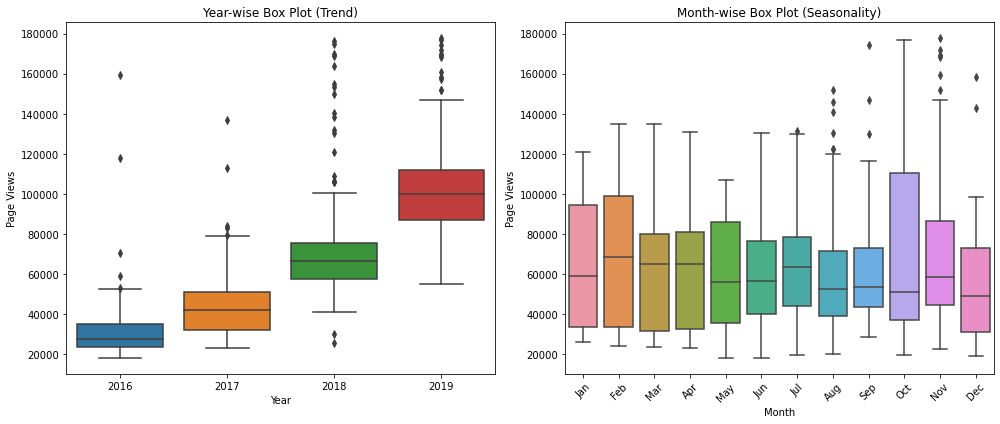

In [11]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    
sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')
    
sns.boxplot(x='month', y='value', data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')
    
plt.setp(ax2.get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()